In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

import numpy as np
import pandas as pd

import cooler

import random

from imputation.imputation import *

In [2]:
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [43]:
#随机选择n个样本 画图
def random_plot(n_sample,data_list,label_list):
    fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
    sample_index = random.sample(range(0, len(data_list)), n_sample)

    #画图
    fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
    for i in range(n_sample):
        ax[i//5,i%5].imshow(data_list[sample_index[i]],cmap=fruitpunch)
        ax[i//5,i%5].set_title("label:"+label_list[sample_index[i]])
    plt.show()

## load data

In [26]:
#稀疏数据
#加载一个单细胞K562的数据看看
resolution = 100000
#10000,20000,50000,10000

# AGTACGCGCGTTACTT

K562_cooler_path = "/share/home/mliu/sc_sv/raw_data/scihic/K562/cooler/K562-AGTACGCGCGTTACTT.mcool::resolutions/{}".format(resolution)
K562_clr = cooler.Cooler(K562_cooler_path)

In [27]:
#rwr的相关参数
resolution_rwr=100000
logscale=False
pad=1
std=1
rp=0.5 #restart probability to balance th information between global and local network structures
tol=0.01 #是什么意思
window_size=500000000
step_size=10000000
output_dist=500000000
min_cutoff=0
n_iters=20

In [28]:
chrom = "chr12"
poor_matrix = K562_clr.matrix(balance=False).fetch(chrom)
#


In [31]:
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)

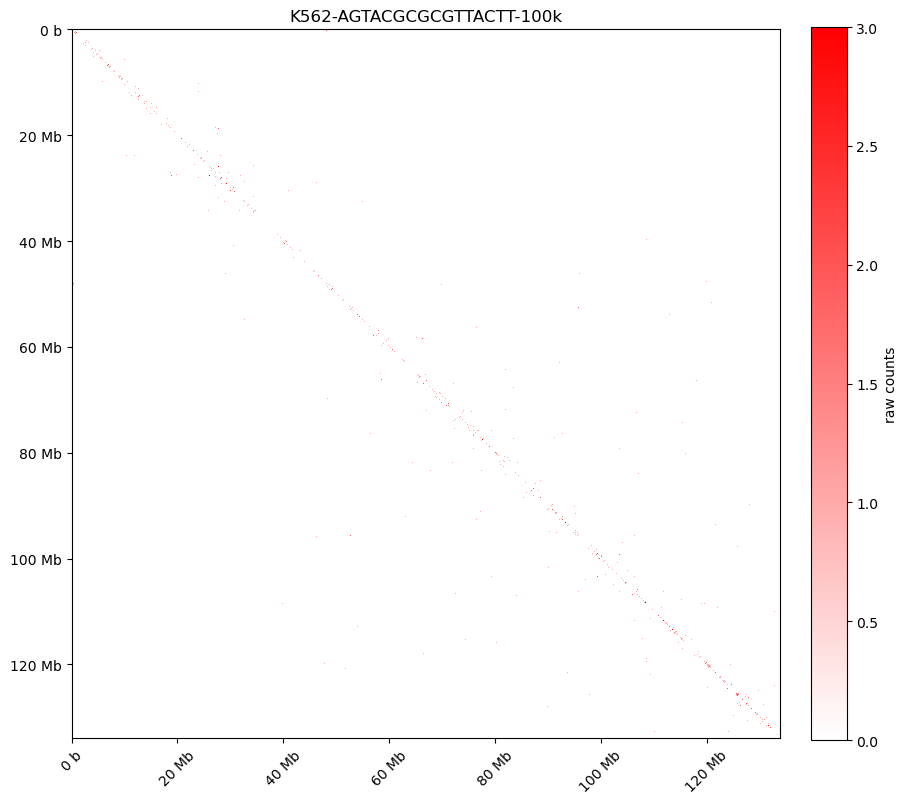

In [32]:
#画图
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(
    poor_matrix,
    vmax=3,
    extent=(0,K562_clr.chromsizes[chrom], K562_clr.chromsizes[chrom], 0),
    cmap=fruitpunch)

plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_title("K562-AGTACGCGCGTTACTT-100k")
format_ticks(ax)
plt.show()

In [21]:
impute_matrix = imputation_rwr(K562_clr,chrom,resolution_rwr,logscale,pad,std,rp,tol,window_size
                    ,step_size,output_dist,min_cutoff,n_iters)
                    

In [25]:
# impute_matrix中多少非零值
print(np.count_nonzero(poor_matrix))
print(np.count_nonzero(impute_matrix))

1896
757134


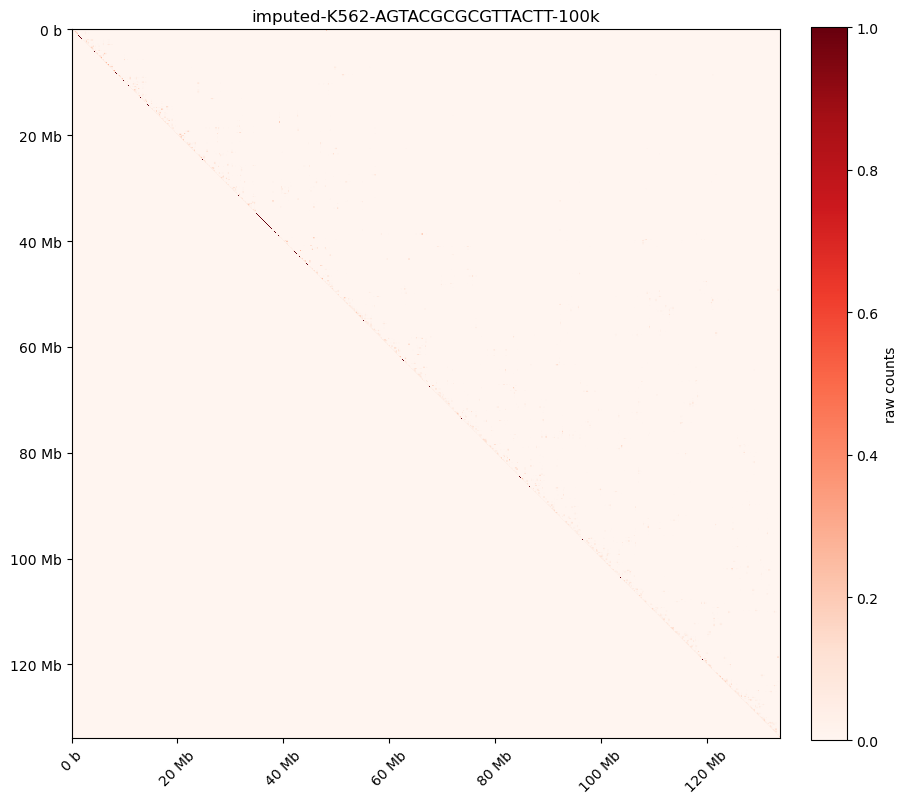

In [26]:
#画图
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(
    impute_matrix,
    vmax=1,
    extent=(0,K562_clr.chromsizes[chrom], K562_clr.chromsizes[chrom], 0),
    cmap="Reds")

plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_title("imputed-K562-AGTACGCGCGTTACTT-100k")
format_ticks(ax)
plt.show()

In [4]:
label = np.load('input_data/label_imputation_binary.npy')
data = np.load('input_data/data_imputation.npy')

In [15]:
data = data.reshape(data.shape[0],21,21)

In [20]:
pos_data = data[label==1]
pos_label = label[label==1].astype(str)

neg_data = data[label==0]
neg_label = label[label==0].astype(str)

In [36]:
# random_plot(10,pos_data,pos_label)
# random_plot(10,neg_data,neg_label)

In [37]:
poor_label = np.load("input_data/label.npy")
poor_data = np.load("input_data/data.npy")

In [39]:
poor_data = poor_data.reshape(poor_data.shape[0],21,21)

In [46]:
poor_pos_data = poor_data[poor_label!=0]
poor_pos_label = poor_label[poor_label!=0].astype(str)

poor_neg_data = poor_data[poor_label==0]
poor_neg_label = poor_label[poor_label==0].astype(str)

[1869, 2014, 334, 1917, 892, 1875, 1056, 1793, 799, 581]
0
1
2
3
4
5
6
7
8
9


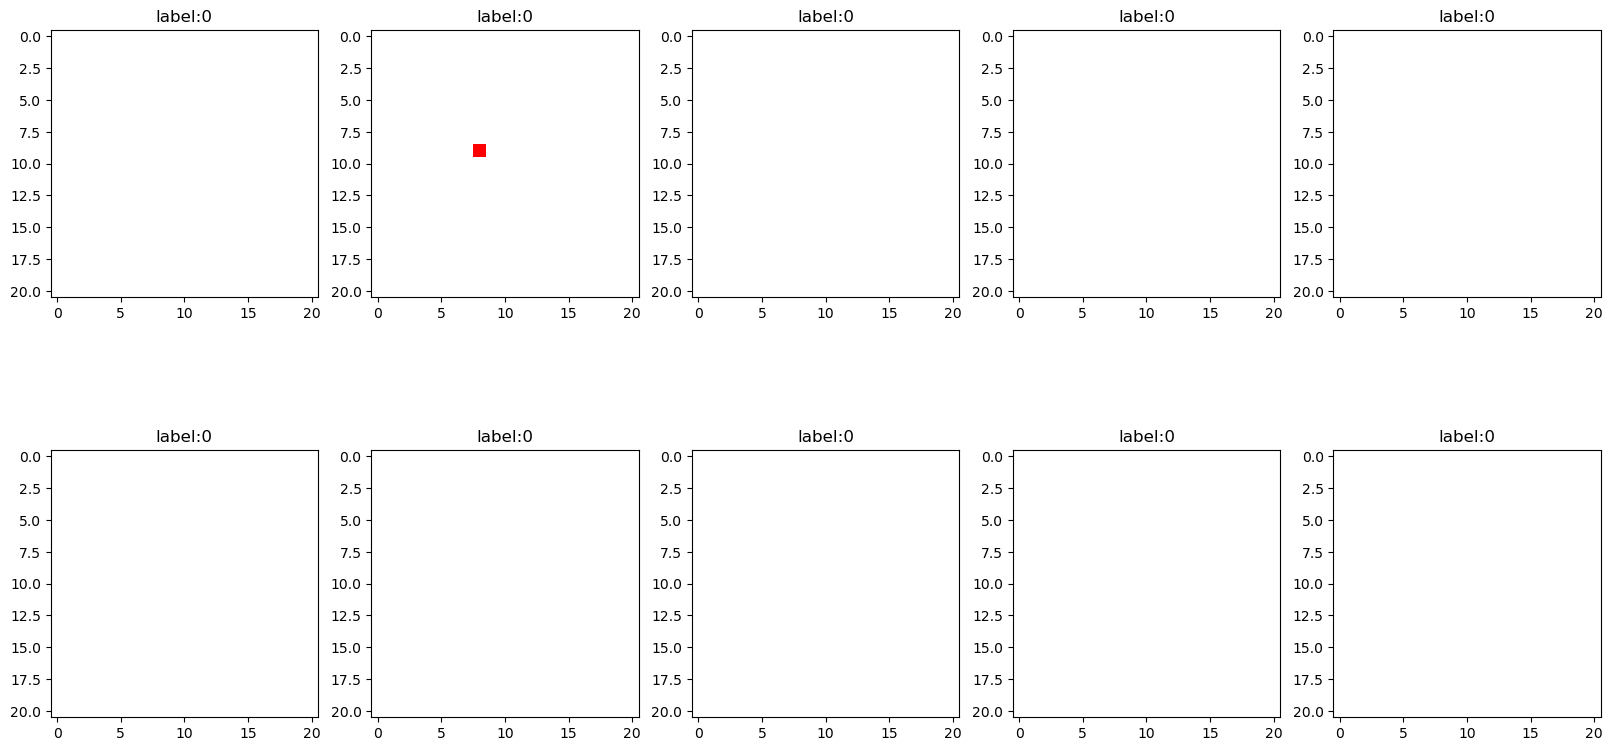

In [48]:


random_plot(10,poor_neg_data,poor_neg_label)